### Import Required Models and Helper Classes

In [1]:
PROJECT_DIR = "/Users/raghav/envPython3/experiments/one_class_neural_networks/"
import sys,os
sys.path.append(PROJECT_DIR)
from src.data.make_dataset import CreateDataSet
from src.models.fakeNoiseNN import FakeNoiseNN

## Create data for training and testing
createData = CreateDataSet()

Using TensorFlow backend.


## FAKE_NOISE_KerasBinaryClassifier

In [2]:

X_Pos,X_PosLabel = createData.get_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= createData.get_TestingData_With_Random_UniformNoise()

## Fake Noise data to be generated
X_Neg,X_NegLabel = createData.get_FAKE_Noise_TrainingData(X_Pos)

## Create an Binary supervised classifier instance
clf_FakeNoiseNN =  FakeNoiseNN()
clf_FakeNoiseNN.fit(X_Pos,X_PosLabel,X_Neg,X_NegLabel)
res = clf_FakeNoiseNN.predict(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
Training the Keras Binary classifier.....
Train on 352 samples, validate on 88 samples
Epoch 1/1
352/352 [==============================] - 0s 744us/step - loss: 0.5597 - acc: 0.7557 - val_loss: 0.0074 - val_acc: 1.0000
Trained Model is Saved at relative path inside PROJECT_DIR  ../models/supervisedBC/
1.0
AUC: 1.0


## SKLEARN OCSVM

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
Training the OCSVM classifier.....
AUC: 1.0


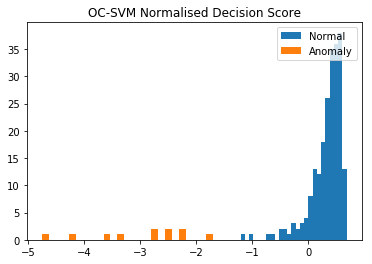

In [3]:

X_Pos,X_PosLabel = createData.get_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= createData.get_TestingData()

##create the classifier
from src.models.ocsvmSklearn import OCSVM
ocsvm = OCSVM()
nu= 0.04
kernel = 'rbf'
clf = ocsvm.fit(X_Pos,nu,kernel)
res = ocsvm.score(clf,Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)

### OC-NN


StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
Training the OCNN classifier.....
Training OC-NN started for epochs:  100
Epoch = 1, r = -566.405496
Total Cost:  18809752.0
Training Time taken, 0.16409778594970703
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -566.4054956054688
Epoch = 2, r = -565.850132
Total Cost:  18769572.0
Training Time taken, 0.29306697845458984
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -565.8501318359375
Epoch = 3, r = -565.294673
Total Cost:  18729436.0
Training Time taken, 0.4156370162963867
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -565.2946728515625
Epoch = 4, r = -564.739231
Total Cost:  18689348.0
Training Time taken, 0.5439798831939697
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -564.7392309570313
Epoch = 5, r =

Epoch = 32, r = -549.564211
Total Cost:  17588528.0
Training Time taken, 10.173420906066895
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -549.5642114257812
Epoch = 33, r = -549.044961
Total Cost:  17550060.0
Training Time taken, 10.715253829956055
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -549.0449609375
Epoch = 34, r = -548.525891
Total Cost:  17511650.0
Training Time taken, 11.280632972717285
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -548.5258911132812
Epoch = 35, r = -548.006990
Total Cost:  17473300.0
Training Time taken, 11.882982015609741
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -548.0069897460937
Epoch = 36, r = -547.488333
Total Cost:  17435014.0
Training Time taken, 12.454838752746582
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -547.4883325195312
Epo

Epoch = 63, r = -533.566121
Total Cost:  16424986.0
Training Time taken, 33.34056091308594
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -533.5661206054688
Epoch = 64, r = -533.053594
Total Cost:  16388457.0
Training Time taken, 34.30921983718872
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -533.05359375
Epoch = 65, r = -532.541401
Total Cost:  16351990.0
Training Time taken, 35.26965093612671
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -532.5414013671875
Epoch = 66, r = -532.029331
Total Cost:  16315586.0
Training Time taken, 36.25561881065369
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -532.0293310546875
Epoch = 67, r = -531.517537
Total Cost:  16279247.0
Training Time taken, 37.25184178352356
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -531.5175366210938
Epoch = 68

Epoch = 94, r = -517.787144
Total Cost:  15321494.0
Training Time taken, 71.18685984611511
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -517.7871435546875
Epoch = 95, r = -517.281921
Total Cost:  15286882.0
Training Time taken, 72.64219188690186
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -517.2819213867188
Epoch = 96, r = -516.776912
Total Cost:  15252331.0
Training Time taken, 74.11900877952576
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -516.7769116210937
Epoch = 97, r = -516.272085
Total Cost:  15217839.0
Training Time taken, 75.54971599578857
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -516.2720849609375
Epoch = 98, r = -515.767549
Total Cost:  15183410.0
Training Time taken, 76.99069094657898
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -515.767548828125
Epoch 

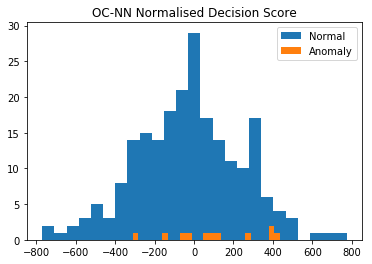

In [4]:
X_Pos,X_PosLabel = createData.get_TrainingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= createData.get_TestingData()

##create the classifier
## Instantiate the object and call the function
from src.models.ocnn import OCNN
ocnn = OCNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,nu,activation,epochs)
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)






### OC-NN WITH FAKENOISE

In [ ]:
X_Pos,X_PosLabel = createData.get_TrainingData()
# [Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= createData.get_TestingData()
[Xtest_Pos,label_ones,Xtest_Neg,label_sevens]= createData.get_TestingData_With_Random_UniformNoise()
##create the classifier
## Instantiate the object and call the function
from src.models.ocnn import OCNN
ocnn = OCNN()

nu= 0.04
activation = 'sigmoid'
epochs = 100
ocnn.fit(X_Pos,nu,activation,epochs)
res = ocnn.score(Xtest_Pos,Xtest_Neg)
print("="*35)
print("AUC:",res)
print("="*35)



StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)
Training the OCNN classifier.....
Training OC-NN started for epochs:  100
Epoch = 1, r = -566.405496
Total Cost:  18809752.0
Training Time taken, 0.16688799858093262
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -566.4054956054688
Epoch = 2, r = -565.850132
Total Cost:  18769572.0
Training Time taken, 0.29708003997802734
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -565.8501318359375
Epoch = 3, r = -565.294673
Total Cost:  18729436.0
Training Time taken, 0.4197671413421631
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -565.2946728515625
Epoch = 4, r = -564.739231
Total Cost:  18689348.0
Training Time taken, 0.5486180782318115
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -564.7392309570313
Epoch = 5, r =

Epoch = 32, r = -549.564211
Total Cost:  17588528.0
Training Time taken, 10.093837022781372
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -549.5642114257812
Epoch = 33, r = -549.044961
Total Cost:  17550060.0
Training Time taken, 10.636492013931274
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -549.0449609375
Epoch = 34, r = -548.525891
Total Cost:  17511650.0
Training Time taken, 11.23994493484497
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -548.5258911132812
Epoch = 35, r = -548.006990
Total Cost:  17473300.0
Training Time taken, 11.791470766067505
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -548.0069897460937
Epoch = 36, r = -547.488333
Total Cost:  17435014.0
Training Time taken, 12.373190879821777
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -547.4883325195312
Epoc

Epoch = 63, r = -533.566121
Total Cost:  16424986.0
Training Time taken, 33.550451040267944
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -533.5661206054688
Epoch = 64, r = -533.053594
Total Cost:  16388457.0
Training Time taken, 34.57643795013428
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -533.05359375
Epoch = 65, r = -532.541401
Total Cost:  16351990.0
Training Time taken, 35.547865867614746
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -532.5414013671875
Epoch = 66, r = -532.029331
Total Cost:  16315586.0
Training Time taken, 36.54781699180603
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -532.0293310546875
Epoch = 67, r = -531.517537
Total Cost:  16279247.0
Training Time taken, 37.545356035232544
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -531.5175366210938
Epoch =

Epoch = 94, r = -517.787144
Total Cost:  15321494.0
Training Time taken, 70.55576610565186
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -517.7871435546875
Epoch = 95, r = -517.281921
Total Cost:  15286882.0
Training Time taken, 71.94739198684692
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -517.2819213867188
Epoch = 96, r = -516.776912
Total Cost:  15252331.0
Training Time taken, 73.38598895072937
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -516.7769116210937
Epoch = 97, r = -516.272085
Total Cost:  15217839.0
Training Time taken, 74.79319596290588
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -516.2720849609375
Epoch = 98, r = -515.767549
Total Cost:  15183410.0
Training Time taken, 76.23764777183533
Saving the trained Model weights ... @ ../models/ocnn/
The optimized value of r found is -515.767548828125
Epoch 